In [1]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

In [2]:
df<-read.csv('./Electric_Utility.csv')

In [3]:
df<-df[,c(2,3)]
colnames(df)<-c('x','y')

In [4]:
fit<-lm(y~x,data=df)

In [5]:
summary(fit)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1399 -0.8275 -0.1934  1.2376  3.1522 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.8313037  0.4416121  -1.882   0.0655 .  
x            0.0036828  0.0003339  11.030 4.11e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.577 on 51 degrees of freedom
Multiple R-squared:  0.7046,	Adjusted R-squared:  0.6988 
F-statistic: 121.7 on 1 and 51 DF,  p-value: 4.106e-15


R2: 약 70%의 변동성이 선형 fitting으로 설명 되고 있다

In [6]:
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,302.6331,302.633136,121.6582,4.106229e-15
Residuals,51,126.8660,2.487569,NA,NA


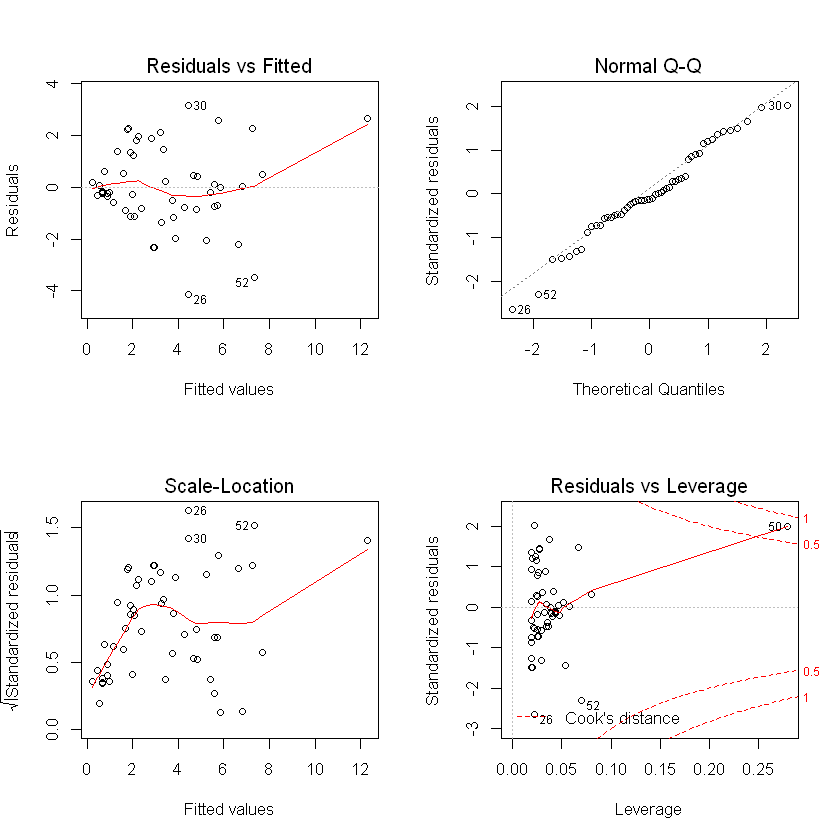

In [7]:
par(mfrow=c(2,2))
plot(fit)

Residual vs fited plot으로 보아 variance가 점차 증가함<br>
y는 전력 사용량이지만 횟수로 보고 poisson transformation y'=root(y)

In [8]:
fit2<-lm( (y)^0.5~x,data=df)

In [9]:
summary(fit2)


Call:
lm(formula = (y)^0.5 ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.39185 -0.30576 -0.03875  0.25378  0.81027 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.822e-01  1.299e-01   4.481 4.22e-05 ***
x           9.529e-04  9.824e-05   9.699 3.61e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.464 on 51 degrees of freedom
Multiple R-squared:  0.6485,	Adjusted R-squared:  0.6416 
F-statistic: 94.08 on 1 and 51 DF,  p-value: 3.614e-13


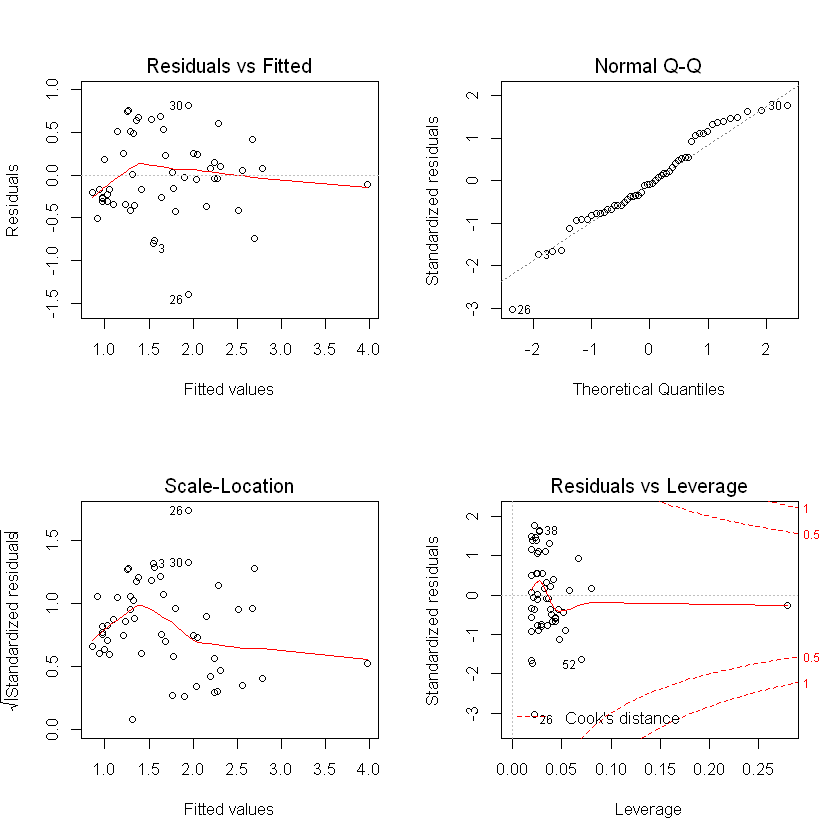

In [10]:
par(mfrow=c(2,2))
plot(fit2)

Residual vs Fitted plot 보면 variance stabilized 확인 가능<br>
26과 50번의 residual 꽤 높음

<b>Box Cox <br></b>

In [11]:
library(MASS)

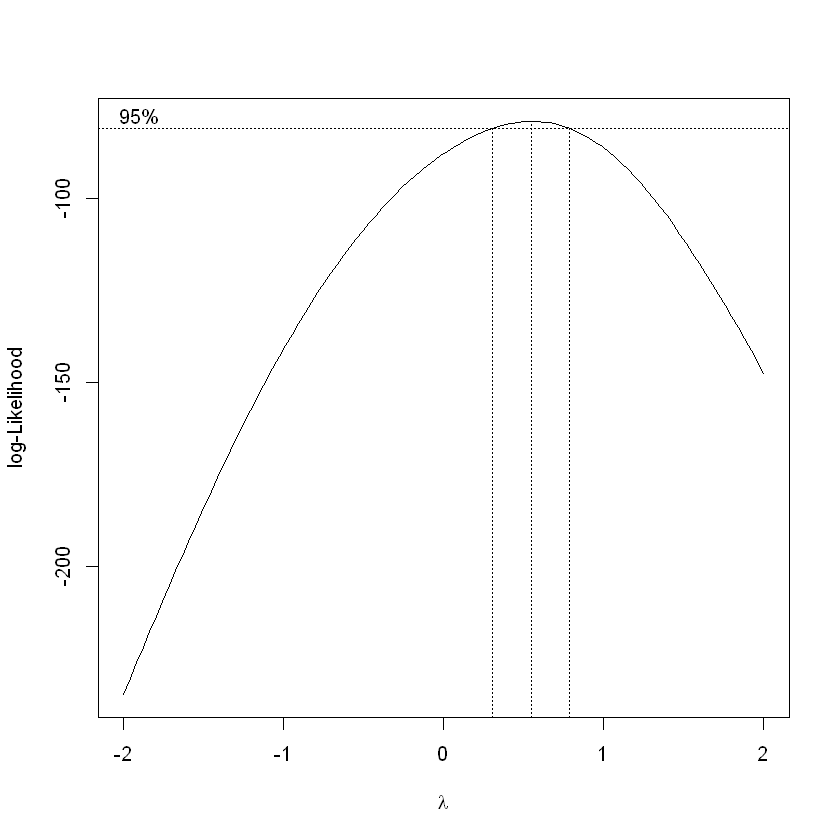

In [12]:
fit_box<-boxcox(y~x,data=df)

grid search로 SSres를 minimize하는 lambda 찾음

In [13]:
lambdas<-fit_box$x
loglik<-fit_box$y
cbind(lambdas,loglik)
lambdas[which.max(loglik)]

lambdas,loglik
-2.0000000,-234.6266
-1.9595960,-230.3175
-1.9191919,-226.0388
-1.8787879,-221.7920
-1.8383838,-217.5786
-1.7979798,-213.4002
-1.7575758,-209.2583
-1.7171717,-205.1546
-1.6767677,-201.0909
-1.6363636,-197.0689


[1] 0.5454545

maximized 하는 lambda는 0.5454이고 이것에 대한 CI가 1을 포함 안하기 떄문에 유의함<br>
앞선 root(y) transformation이 의미 있음